## Submitted by:
## S. Bhuvanesh
### 2018113002

# Coin toss

If a coin has a probability of $p$ for showing heads and $q=1-p$ for showing heads, then the probability of seeing $M$ heads when coin is tossed $n>M$ times is given by: 
$$ P(M;n) = \frac{n!}{M!(n-M)!} p^M q^{n-M} $$


If the average the number of heads is denoted $M_n\equiv M/n$, then clearly $0\le M_n \le 1$ and we expect that $M_{n\rightarrow \infty} = p$. For $M_n$ being in the range $(x,y)$, we have: 
$$ Prob(x<M_n<y) = \sum_{r \in \mathcal Z~\wedge~x<\frac{r}{n}<y} P(r;n) $$



## Task-1:  
1. Plot $\log P(M_n=x)$ vs $x$ for various $n$.  Note that $\int_{0}^{1} dx~P(M_n=x) = 1$.
2. Show that $P(M_n=x)$ near $x=\frac{1}{2}$ is Gaussian.
3. Fit a Gaussian curve to $P(M_n = x)$

In [7]:
%matplotlib  notebook
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
from scipy.special import comb
from scipy.optimize import curve_fit

In [8]:
def generate_array(n,ar):
    '''This function takes two arguments: 
    n = number of random numbers to be generated 
    ar = list which contains the elements from which the random object has to be picked.
    
    Returns : List of n randomly generated objects from the list ar'''
    
    output=np.array([]);
    temp = np.random.randint(0,len(ar),size=n)
    for i in temp:
        output = np.append(output,ar[i%len(ar)])
        
    return output;

In [13]:
def PMn(x,n,p):
        '''Returns Probability of M_n == x with n and p as additional arguments'''
        temp = int(n*x)
        #print("Evaluating "+str(n)+"choose"+str(temp))
        output = comb(n,temp)* p**temp *(1-p)**(n-temp)
        #print("Returning " + str(output))
        return output
def logPeqX(n,p):
    '''Plots Logarithm of Probability of M_n == x for all x belonging to [0,1] for a given n'''
    xar = np.array([])
    yar = np.array([])
    for i in np.linspace(0,1,100):
        xar = np.append(xar,i)
        yar = np.append(yar,math.log(PMn(i,n,p)))
    
    plt.plot(xar,yar,label = "n = " + str(n))
    plt.xlabel("x")
    plt.ylabel("$P(M_n=x)$")
    plt.legend()
    return yar
    

<IPython.core.display.Javascript object>


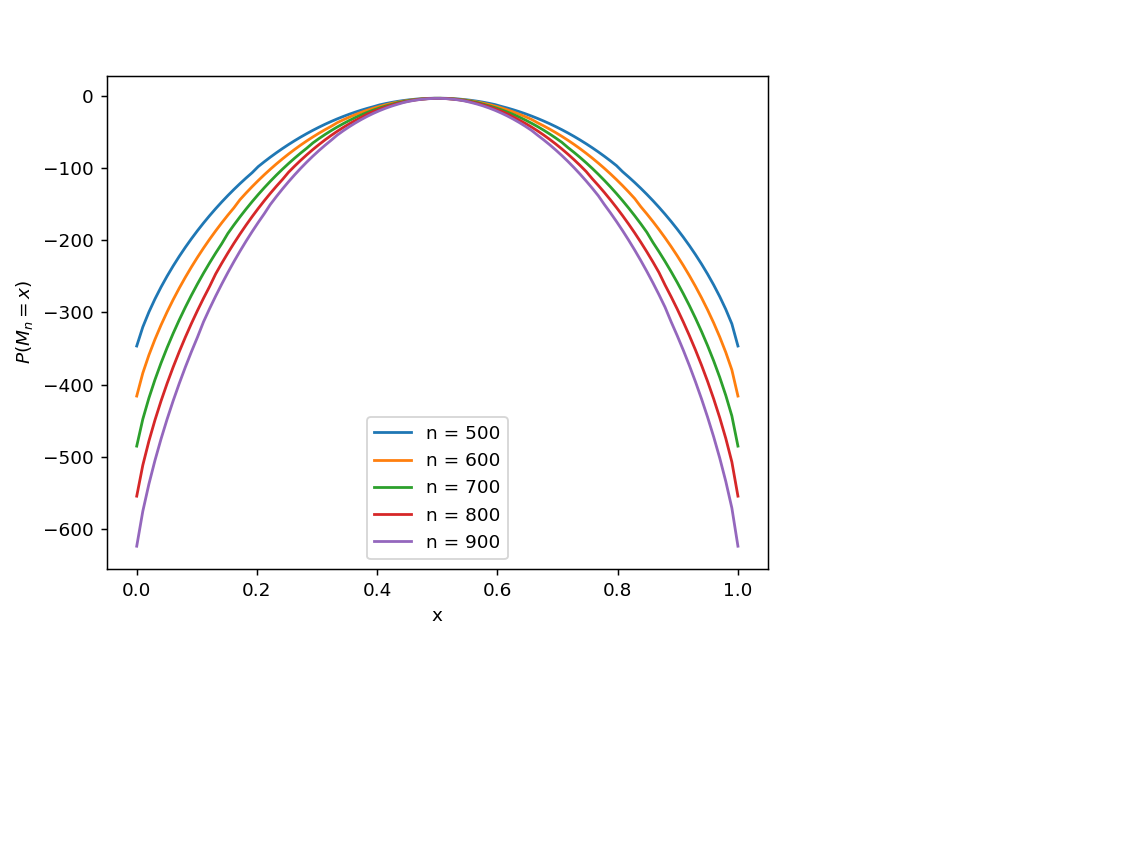

In [10]:
for i in [500,600,700,800,900]:
    logPeqX(i,0.5)

<IPython.core.display.Javascript object>


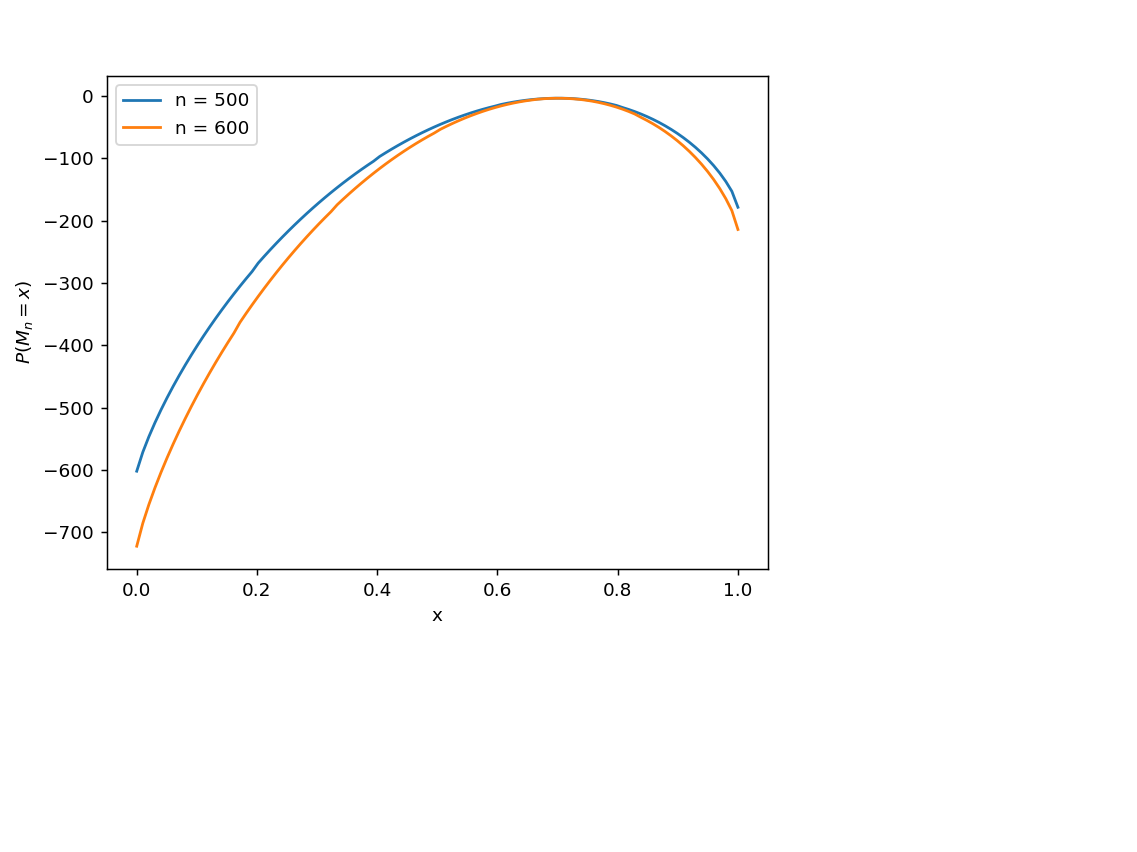

In [12]:
for i in [500,600]:
    logPeqX(i,0.7)

In [32]:
# Fitting the curve with a Gaussian Curve:
def curveFitGaussian():
    def fGaussian(x,sigma,scale,k):
        mean = 0.5
        #return scale * (x-mean)**2
        return  k + scale*  np.e** (-(x-mean)**2/sigma**2)
    popt , covar = curve_fit(fGaussian,np.arange(0,1,0.01),logPeqX(600,0.5))

    plt.plot(np.arange(-.1,1.1,0.01),fGaussian(np.arange(-.1,1.1,0.01),*popt),label="The Fitted Gaussian Curve")
    plt.legend()
    print(popt)
    

<IPython.core.display.Javascript object>


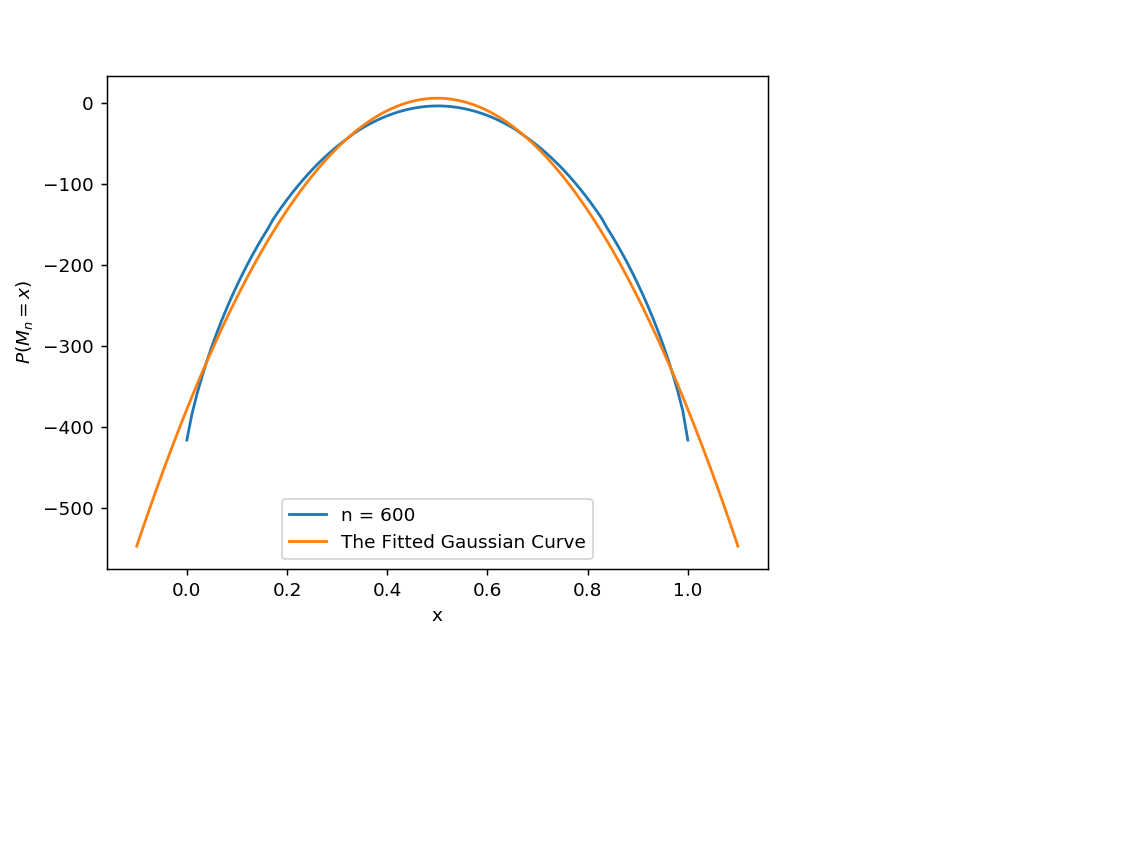

[-4.84021083e+01  3.59878012e+06 -3.59877404e+06]


In [33]:
curveFitGaussian()

## Task-2:  Assume a fair coin from now on i.e. $p=q=\frac{1}{2}$

Plot $\log P(M_n > x)$ as a function of $n\in[1,250]$ for $x=0.6,~0.7,~0.8,~0.9$

In [34]:
def logPgrX(x,n):
    '''This function returns as array containing the logarithm of Probability of getting '''
    xar2 = np.array([])
    yar2 = np.array([])
    for j in range(1,n):
        temp = 0;
        #print(np.arange(x,1,0.01))
        for i in np.arange(x,1,0.001):
            temp += PMn(i,j,0.5)
        #print(temp)
        yar2 = np.append(yar2,math.log(temp))
    
    plt.plot(range(1,n),yar2, label = "For x >" + str(x)  )
    plt.xlabel("For $n \belongs [1,251]$")
    plt.ylabel("$log(P(M_n)>x)$")
    plt.legend
    return yar2     

<IPython.core.display.Javascript object>


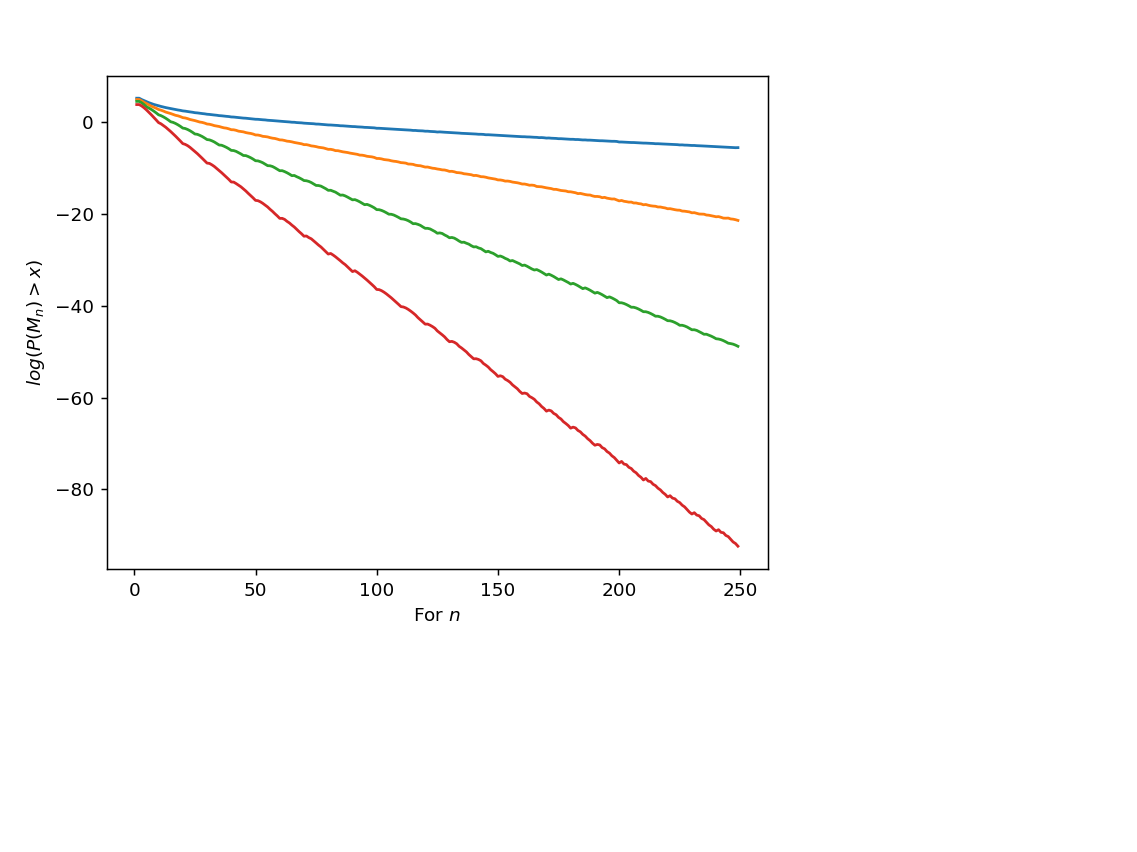

In [37]:
for i in [0.6,0.7,0.8,0.9]:
    logPgrX(i,250)

## Task-3: 
Note that for large $N$, the above plots are linear. 
Fit the above plots (of $\log Prob(M_n >x)$ vs $n$) to straight lines for large $n$ and get the slope, which we will call $I(x)$. Now plot $I(x)$ vs $x$.

In [60]:
def curveFitLine(n,arr):
    def fline(x,m,c):
        return m*x+c 
    popt , covar = curve_fit(fline,range(1,n),arr)

    plt.plot(range(1,n),fline(range(1,n),*popt),label="The Fitted Straight Line Slope : "+ str(popt[0]))
    plt.legend()
    print(popt)

<IPython.core.display.Javascript object>


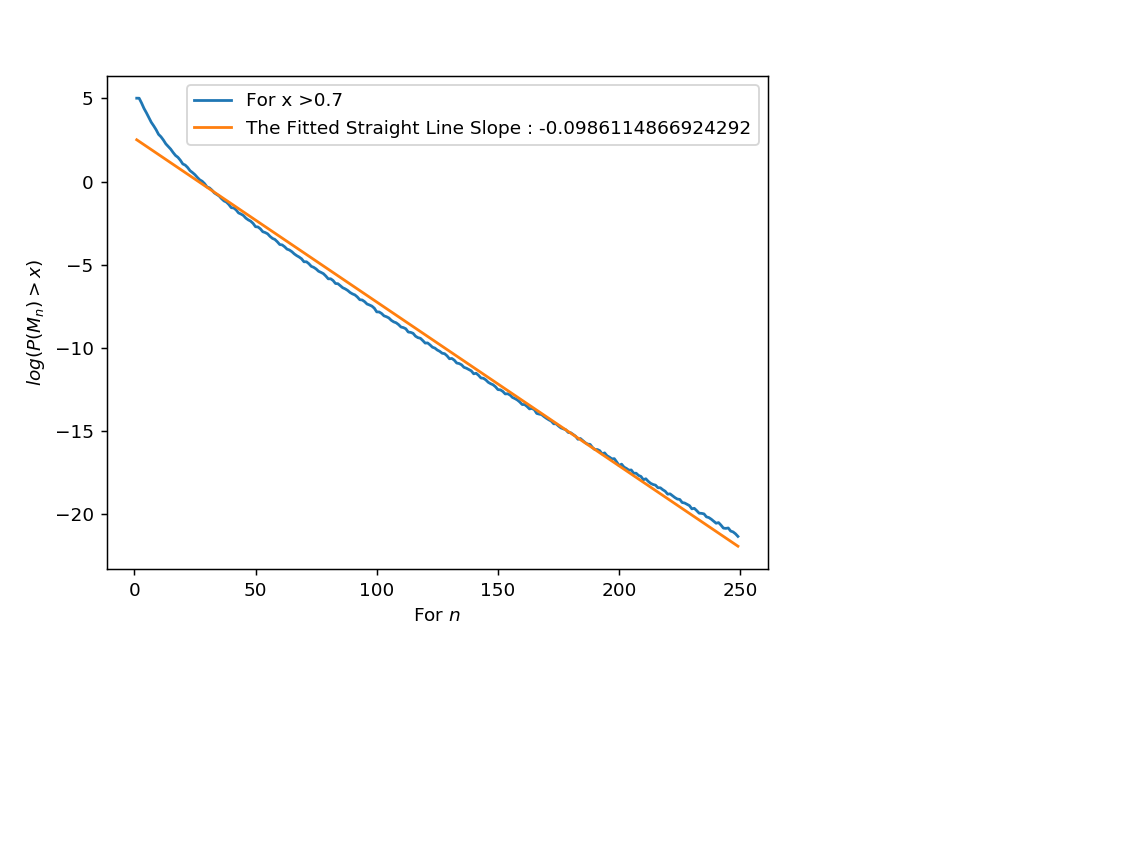

[-0.09861149  2.61096516]


In [61]:
curveFitLine(250,logPgrX(0.7,250))

## Task-4:  Random walk
Let $c(t)$ be the result of coin toss, tossed at time $t$. Then Random Walk is given by 
$$ x(t+1) = x(t) + \delta_{c(t),H} - \delta_{c(t),T}
$$ 
with $x(0)=0$.

Plot a one realisation of $x(t)$ for $t\in[0,100]$


In [48]:
#Generating data of average final position by conducting many experiments
def generate_ManyAvgs(n):
    avg_ar = np.array([])
    it = 50
    for i in range(n):
        avg_ar = np.append(avg_ar,generate_array(it,[-1,1]).sum()/it)
    return avg_ar


In [49]:
def XvT(n):
    xar=range(0,n)
    yar=np.array([0])
    for i in range(1,n) :
        yar = np.append(yar,yar[-1]+generate_array(1,[-1,1])[0])
    return yar


<IPython.core.display.Javascript object>


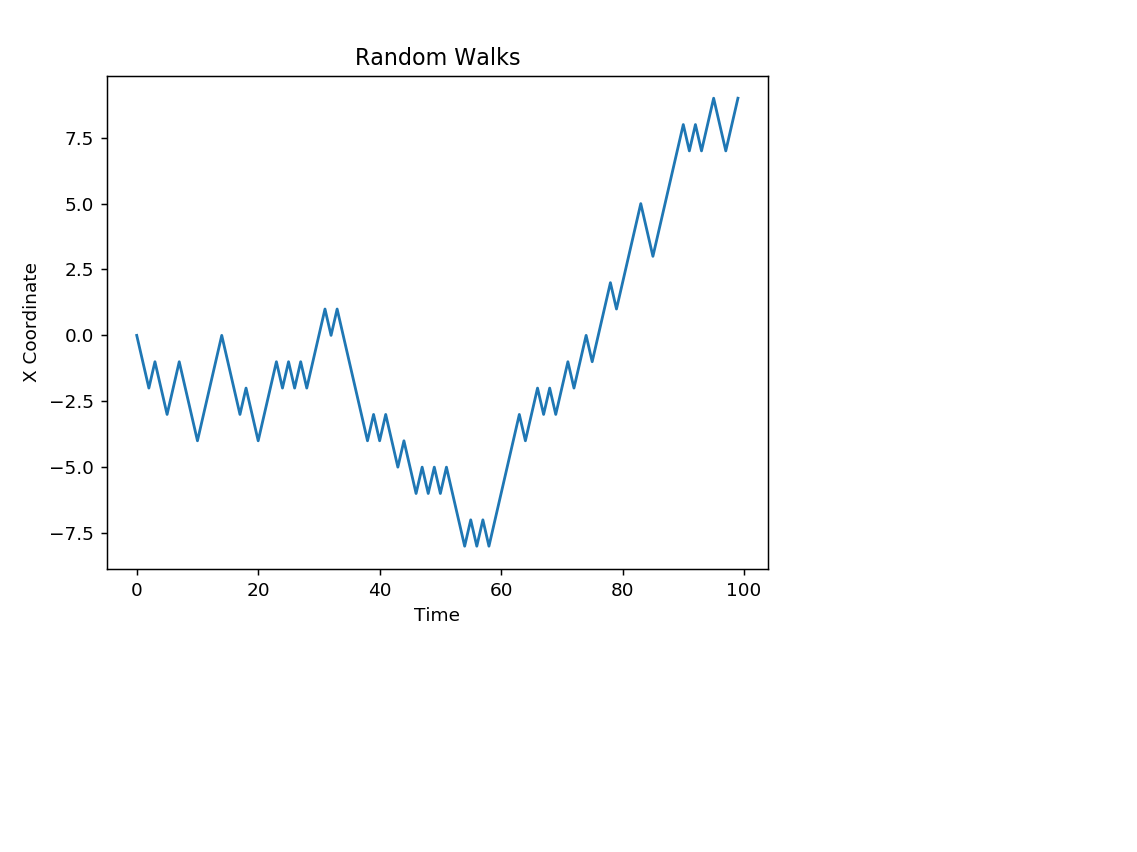

Text(0, 0.5, 'X Coordinate')

In [52]:
plt.plot(range(100),XvT(100))
plt.title("Random Walks")
plt.xlabel("Time")
plt.ylabel("X Coordinate")
#plt.legend()

<IPython.core.display.Javascript object>


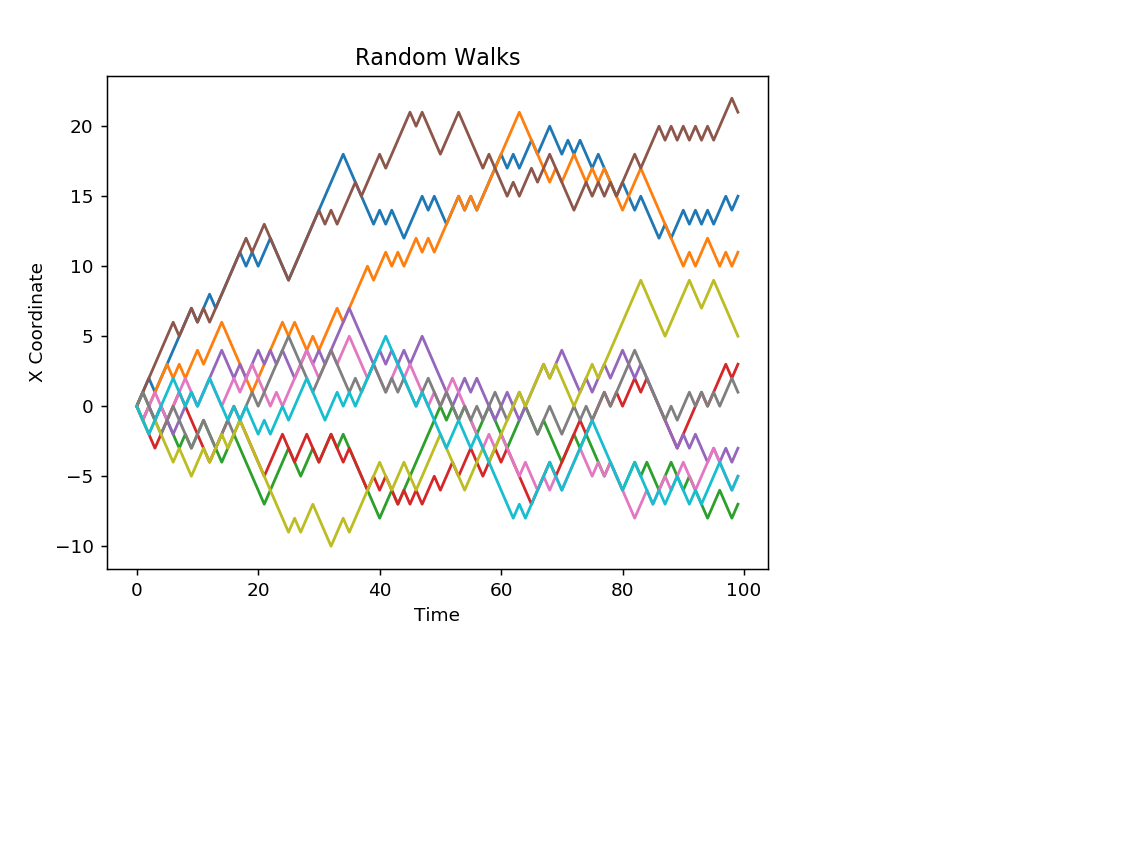

Text(0, 0.5, 'X Coordinate')

In [53]:
def manyWalks(n):
    for i in range(n):
        plt.plot(range(100),XvT(100))
manyWalks(10)
plt.title("Random Walks")
plt.xlabel("Time")
plt.ylabel("X Coordinate")

## Task-5: Moments of distribution of $x(t)$

1. What would be $\langle x(t) \rangle$? 
2. What would be $\langle x^2(t) \rangle$? Why?
3. Compute them by genrating a sample of random walks. Comment on the 'error' of the calculation

In [54]:
# Calculating Average of x(t)
def avgXatT(it,t):
    '''Calculating average x(t) over it iterations'''
    sumXT = 0
    for i in range(it):
        sumXT += XvT(t+1)[-1]
    return sumXT/it

In [56]:
print(avgXatT(1000,100))

0.05


In [57]:
# Calculating Average of x^2(t)

def avgX2atT(it,t):
    '''Calculating average x^2(t) over it iterations'''
    sumX2T = 0
    for i in range(it):
        sumX2T += XvT(t+1)[-1]**2
    return sumX2T/it

In [58]:
print(avgX2atT(1000,100))

104.648


In [67]:
def plotAvgX2(n) :
    xar = range(1,n)
    yar = np.array([])
    for i in xar:
        yar = np.append(yar,avgX2atT(1000,i))
    plt.plot(xar,yar)
    return yar 


<IPython.core.display.Javascript object>


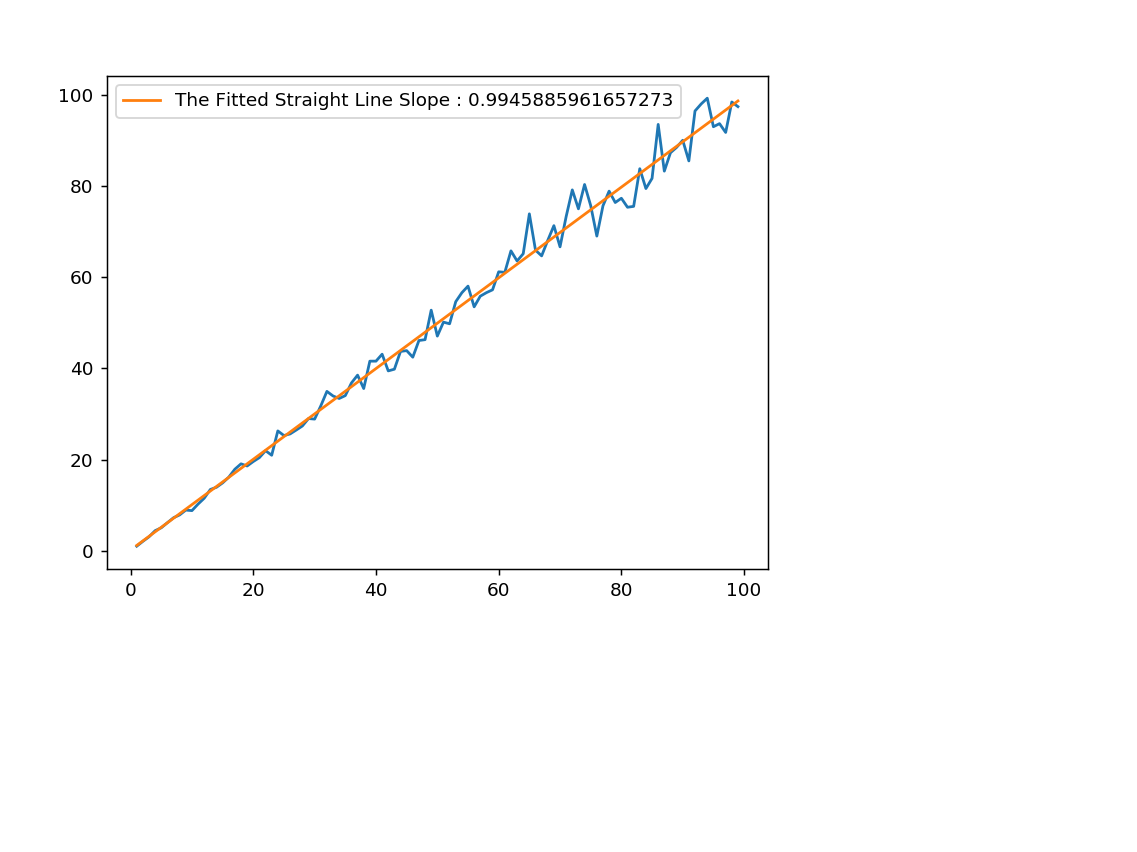

[0.9945886  0.17186312]


In [68]:
curveFitLine(100,plotAvgX2(100))

## Task-6: Random walk with a trap

At $x=M$, random walker is trapped, i.e. imangine that $x=M$ is the location of jail, where once the 'drunk' random walker reaches, is trapped for ever. 

Let $y_M(t)$ is the probabilty that a trapped random walker at time $t$ in a trap located at $x=M$, given that  starting  point is $x=0$ at $t=0$. 

Compute $y_M(t)$ by generating a sample of random walks. Comment.

In [71]:
def probTrap(t,m,it):
    trapped = 0 
    flag = 0
    for i in range(it):
        temp = XvT(t)
        for i in temp:
            if i == m :
                trapped = trapped + 1
                flag=1
        if flag == 1 :
            flag = 0
            continue 
    return trapped/it
    

In [74]:
# Probability of  walker getting trapped at x=3 at time = 4 Calculated over 100 iterations
probTrap(4,3,1000)

0.123

<IPython.core.display.Javascript object>


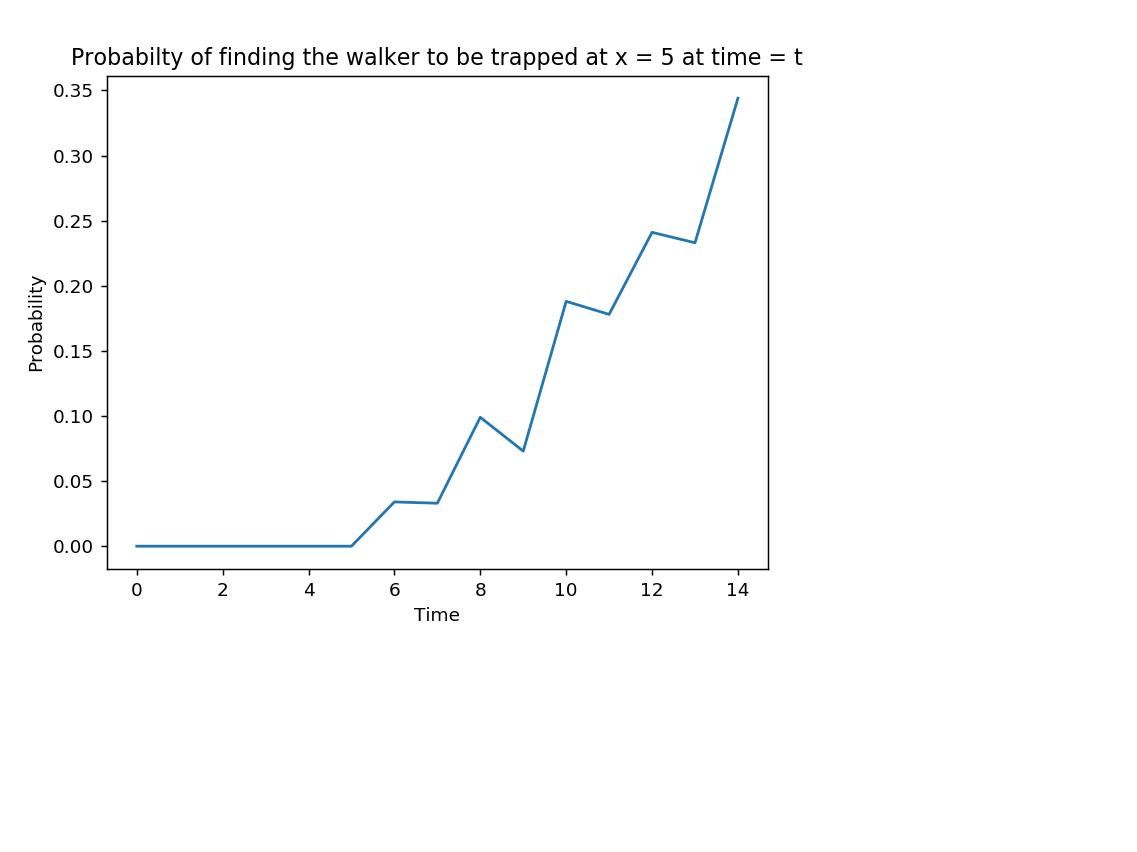

Text(0, 0.5, 'Probability')

In [85]:
x = range(15)
y = []
for i in x:
    y = np.append(y,probTrap(i,5,1000))
plt.plot(x,y)
plt.title("Probabilty of finding the walker to be trapped at x = 5 at time = t")
plt.xlabel("Time")
plt.ylabel("Probability")


<IPython.core.display.Javascript object>


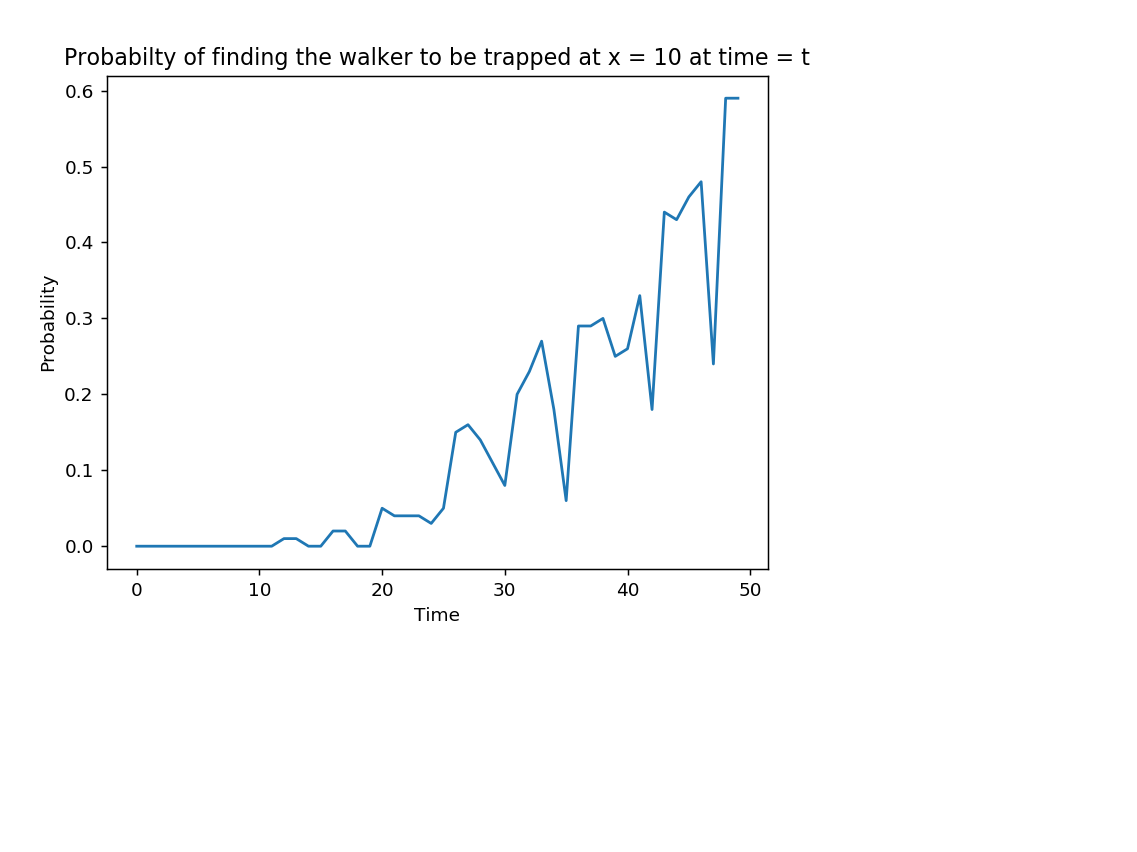

Text(0, 0.5, 'Probability')

In [89]:
x = range(50)
y = []
for i in x:
    y = np.append(y,probTrap(i,10,100))
plt.plot(x,y)
plt.title("Probabilty of finding the walker to be trapped at x = 10 at time = t")
plt.xlabel("Time")
plt.ylabel("Probability")

<IPython.core.display.Javascript object>


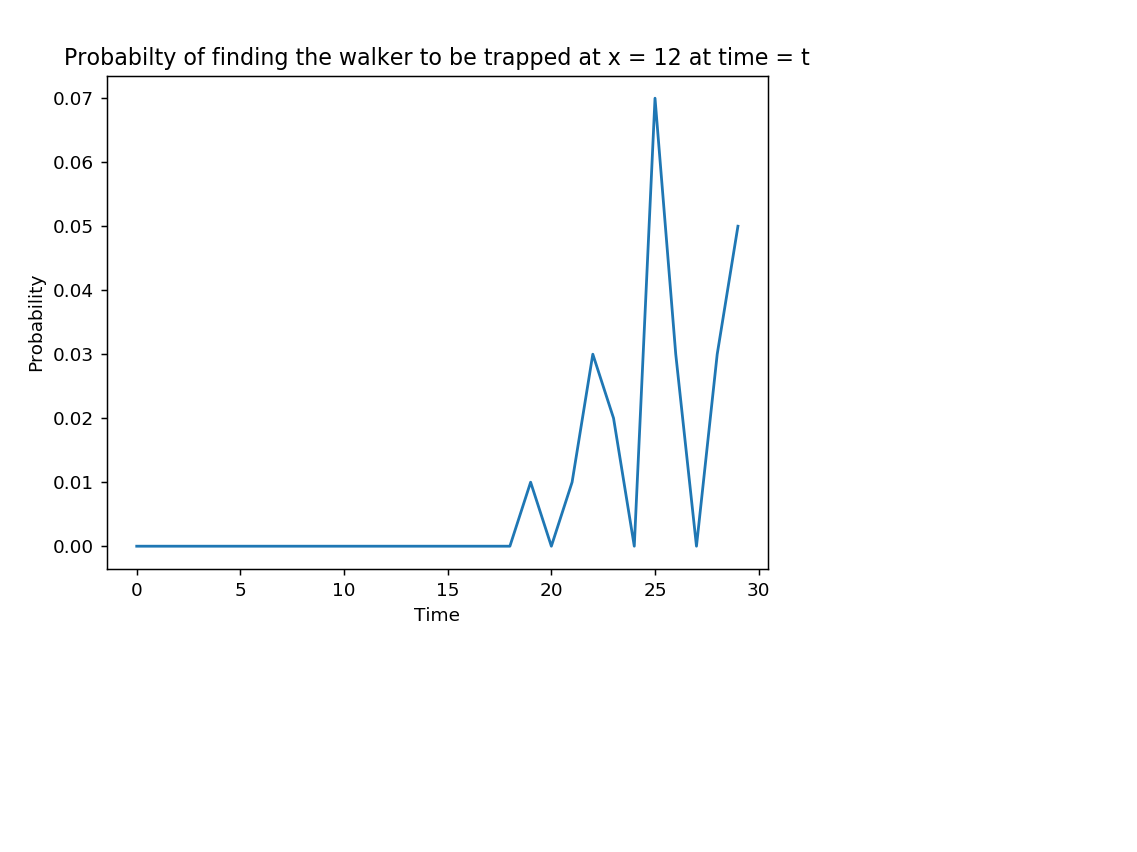

Text(0, 0.5, 'Probability')

In [88]:
x = range(30)
y = []
for i in x:
    y = np.append(y,probTrap(i,12,100))
plt.plot(x,y)
plt.title("Probabilty of finding the walker to be trapped at x = 12 at time = t")
plt.xlabel("Time")
plt.ylabel("Probability")

##### We find that for smaller M's the probability rises quite fast to approach 1 as time increases as it is more likely that once the prisoner gets trapped he will forever be there
##### As M increases , we see a great decrease in the probability of him getting trapped.